In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
df=pd.read_csv('dataset_2_1.csv')

In [5]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [7]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [8]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [9]:
df.shape

(1259, 27)

In [10]:
df.replace('NA', np.nan, inplace=True)


In [11]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')


In [13]:
df['Age'] = df['Age'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\430632\AppData\Local\Temp\ipykernel_22244\3513644294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [14]:
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [15]:
def assign_region(country):
    if country in ['United States', 'Canada', 'Mexico']:
        return 'North America'
    elif country in ['United Kingdom', 'France', 'Portugal', 'Netherlands', 'Switzerland',
                    'Poland', 'Germany', 'Russia', 'Slovenia', 'Austria', 'Ireland',
                    'Belgium', 'Sweden', 'Italy', 'Moldova', 'Czech Republic', 'Finland',
                    'Greece']:
        return 'Europe'
    elif country in ['India', 'Singapore', 'Philippines', 'China']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand']:
        return 'Oceania'
    elif country in ['Brazil', 'Colombia', 'Costa Rica']:
        return 'South America'
    elif country in ['South Africa']:
        return 'Africa'
    elif country in ['Israel']:
        return 'Middle East'
    else:
        return 'Other'

df['Region'] = df['Country'].apply(assign_region)

In [16]:
print("\nAge Group distribution:")
print(df['Age_Group'].value_counts())
print("\nRegion distribution:")
print(df['Region'].value_counts())


Age Group distribution:
Age_Group
26-35    706
36-45    277
19-25    210
46-55     42
56-65     13
0-18      10
66+        1
Name: count, dtype: int64

Region distribution:
Region
North America    826
Europe           347
Oceania           29
Other             21
Asia              16
South America      9
Africa             6
Middle East        5
Name: count, dtype: int64


In [17]:
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Gender'] = df['Gender'].replace({
    'm': 'Male', 'male-ish': 'Male', 'maile': 'Male', 'cis male': 'Male', 'man': 'Male',
    'f': 'Female', 'female ': 'Female', 'woman': 'Female', 'cis female': 'Female', 'femail': 'Female',
    'trans-female': 'Other', 'p': 'Other', 'ostensibly male, unsure what that really means': 'Other',
    'something kinda male?': 'Other', 'male ': 'Male', 'female (trans)': 'Other',
    'queer/she/they': 'Other', 'non-binary': 'Other', 'fluid': 'Other', 'genderqueer': 'Other',
    'androgyne': 'Other', 'agender': 'Other', 'trans woman': 'Other', 'neuter': 'Other',
    'female (cis)': 'Female', 'cis-female/femme': 'Female', 'male (cis)': 'Male',
    'queer': 'Other', 'a little about you': 'Other', 'guy (-ish) ^_^': 'Male'
})

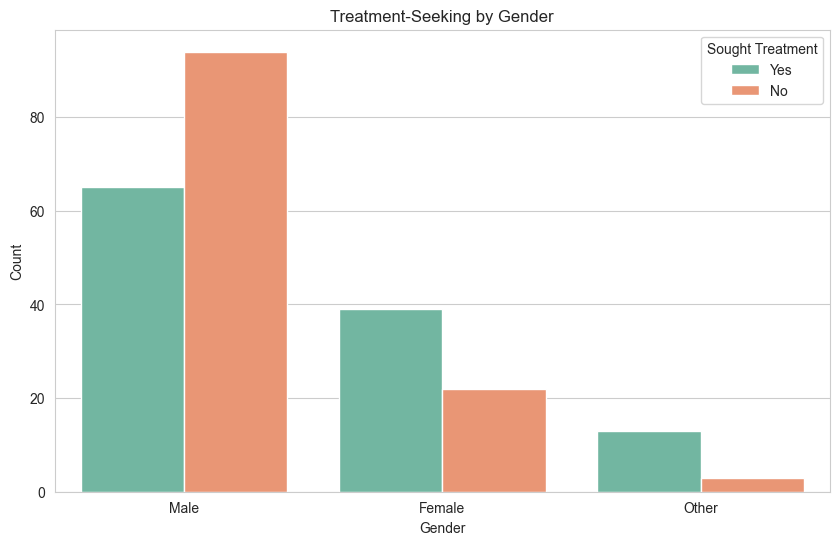

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='treatment', palette='Set2', order=['Male', 'Female', 'Other'])
plt.title('Treatment-Seeking by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.xticks(rotation=0)  # No rotation needed with fewer categories
plt.show()

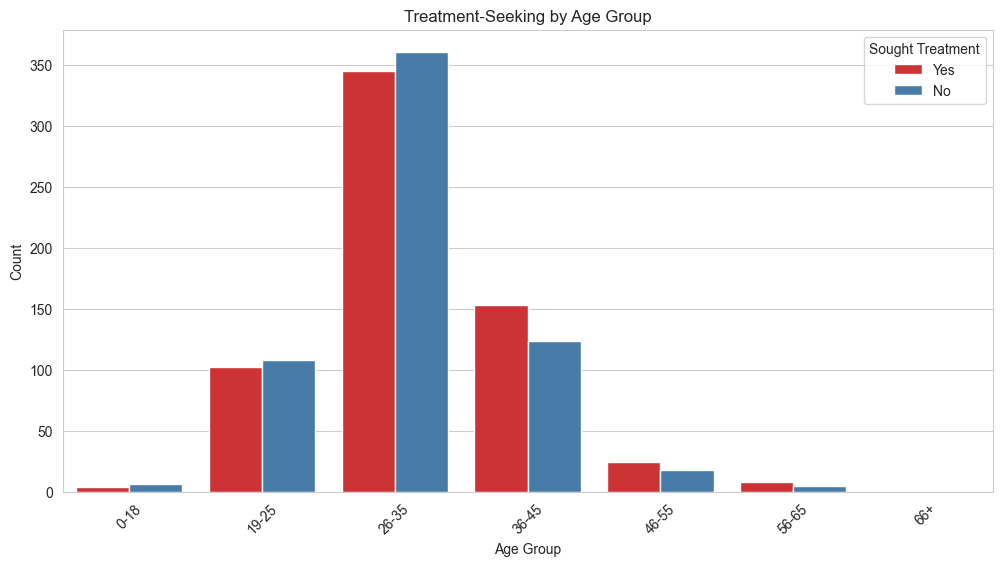

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age_Group', hue='treatment', palette='Set1')
plt.title('Treatment-Seeking by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.xticks(rotation=45)
plt.show()

In [20]:
support_cols = ['benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity']
df['Support_Score'] = df[support_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

C:\Users\430632\AppData\Local\Temp\ipykernel_22244\451523894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='seek_help', y='Support_Score', palette='Set3')


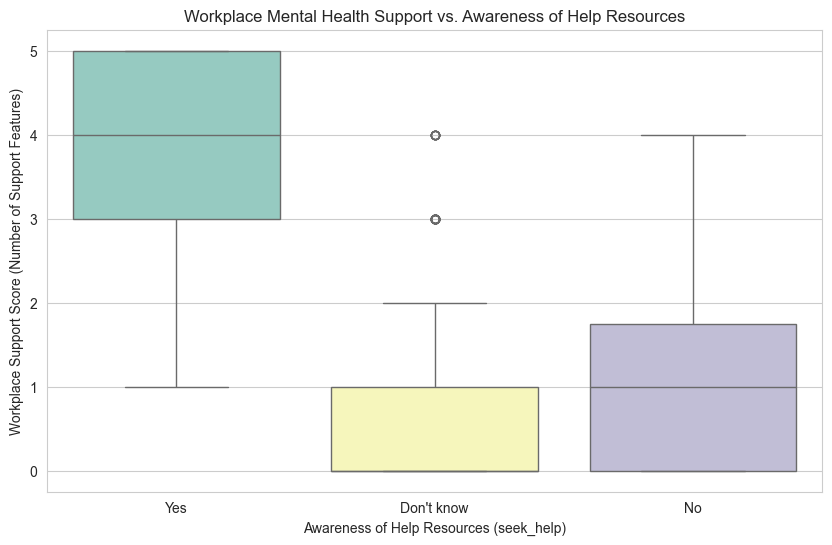

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='seek_help', y='Support_Score', palette='Set3')
plt.title('Workplace Mental Health Support vs. Awareness of Help Resources')
plt.xlabel('Awareness of Help Resources (seek_help)')
plt.ylabel('Workplace Support Score (Number of Support Features)')
plt.show()

C:\Users\430632\AppData\Local\Temp\ipykernel_22244\160255975.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Support_Score', palette='Set2')


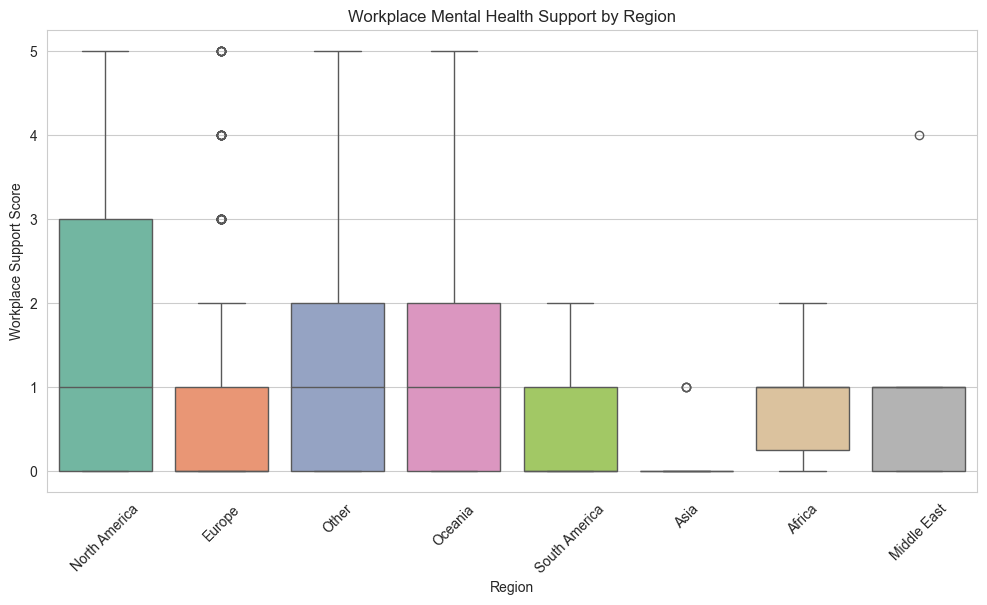

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region', y='Support_Score', palette='Set2')
plt.title('Workplace Mental Health Support by Region')
plt.xlabel('Region')
plt.ylabel('Workplace Support Score')
plt.xticks(rotation=45)
plt.show()

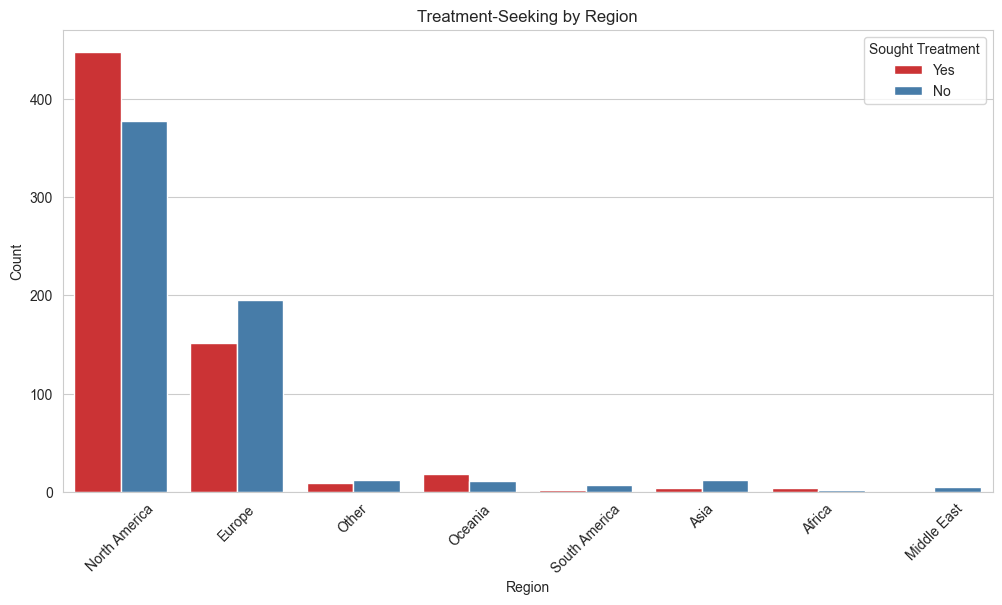

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', hue='treatment', palette='Set1')
plt.title('Treatment-Seeking by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.xticks(rotation=45)
plt.show()

In [24]:
df.shape

(1259, 30)